# 깃허브 연동

In [ ]:
!git pull origin master --allow-unrelated-histories

In [35]:
!git add test.ipynb
!git commit -m "Connect Google Colab with Github"

On branch main
Your branch and 'origin/main' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   XGBoost_Juyeol.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	"../Presentation/\341\204\200\341\205\250\341\204\222\341\205\254\341\206\250\341\204\207\341\205\241\341\206\257\341\204\221\341\205\255_7\341\204\214\341\205\251.pptx"
	"../Presentation/\341\204\214\341\205\256\341\206\274\341\204\200\341\205\241\341\206\253\341\204\207\341\205\241\341\206\257\341\204\221\341\205\2551.pptx"
	"../document/1\341\204\216\341\205\241 \341\204\206\341\205\246\341\206\253\341\204\220\341\205\251\341\204\205\341\205\265\341\206\274\341\204\207\341\205\251\341\204\200\341\205\251\341\204\211\341\205\245_\341\204

In [36]:
!git push

To https://github.com/qkrjuyeol/boiler-efficiency-checker.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/qkrjuyeol/boiler-efficiency-checker.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [70]:
!git add XGBoost_Juyeol.ipynb
!git commit -m "XGBoost models and Data visuallization"

[main 91bfa9d] XGBoost models and Data visuallization
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite AI/XGBoost_Juyeol.ipynb (85%)
<books/Github/boiler-efficiency-checker/.git/COMMIT_EDITMSG" 20L, 2413B▽  Pzz\[0%m           [>c]10;?]11;?XGBoost models and Data visuallization# Please enter the commit message for your changes. Lines starting# with '#' will be ignored, and an empty message aborts the commit.
#
# Date:      Wed Oct 9 05:36:37 2024 +0000
#
# On branch main
# Your branch is ahead of 'origin/main' by 5 commits.
#   (use "git push" to publish your local commits)
#
# Changes to be committed:
#       modified:   XGBoost_Juyeol.ipynb
#
# Untracked files:
#       "../Presentation/\341\204\200\341\205\250\341\204\222\341\205\254\341\206\250\341\204\207\3441\205\241\341\206\257\341\204\221\341\205\255_7\341\204\214\341\205\251.pptx"
#       "../Presentation/\341\204\214\341\205\256\341\206\274\341\204\200\341\205\241\341\206\253\3441\204\207\341\205\241\341\206\257\

KeyboardInterrupt: 

In [66]:
!git push

Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 2 threads
Compressing objects: 100% (16/16), done.
Writing objects: 100% (16/16), 885.01 KiB | 4.13 MiB/s, done.
Total 16 (delta 7), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (7/7), completed with 1 local object.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        l

#데이터 전처리

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 2. Load your dataset
df = pd.read_csv('/content/boiler_data.csv')

# 3. Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# 4. Handle missing values
# For numerical columns, fill missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['float64', 'int64']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))

df = df.drop(columns=[
    "Power Consumption",
    "Vibration Sensor 1",
    "Vibration Sensor 2",
    "Operating Time",
    "Normal Operation Probability",
    "Blower Failure Probability",
    "Air Damper Failure Probability",
    "Gas Damper Failure Probability",
    "Probability Update Time",
    "Instantaneous Steam Amount",
    "Input-Output Efficiency",
    "Heat Loss Efficiency"
])


# For categorical columns, fill missing values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object']))

# 5. Encode categorical variables (if any)
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# 6. Scale numerical features (optional, but good practice)
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 7. Final preprocessed data
print(df.head())  # Display the first few rows of the preprocessed data


Missing values per column:
 Creation date                               0
load factor                                 0
Set Pressure                                0
Boiler Pressure                             0
Blower Inverter Output                      0
Blower Input                                0
Water Supply Pump                           0
Water Supply Pump Input                     0
Gas Damper                                  0
Gas Damper Input                            0
Air Damper                                  0
Air Damper Input                            0
Recirculation External Air Damper           0
Recirculation Damper Input                  0
Recirculation External Damper               0
Recirculation Damper Input.1                1
Recirculation External Damper Input         1
Water Supply Level                          1
Boiler Temperature                          1
Exhaust Gas Temperature 1                   1
Exhaust Gas Temperature 2                   1
Exhaus

# XGBoost 알고리즘 모델

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Efficiency (Instantaneous)'])  # 타겟 변수를 제외한 특징 변수
y = df['Efficiency (Instantaneous)']  # 타겟 변수

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# XGBoost 모델 초기화
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # 시도할 조합의 수
    scoring='neg_mean_squared_error',
    cv=5,  # 5겹 교차검증
    verbose=1,
    random_state=42,
    n_jobs=-1  # 모든 CPU 코어 사용
)

# 랜덤 서치 실행
random_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적의 하이퍼파라미터: {'subsample': 0.6, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.5}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np  # numpy를 임포트하여 sqrt 사용

# 예측
y_pred = random_search.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE 계산

# MAPE 계산
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE 계산 (백분율로)

# 결과 출력
print(f'테스트 데이터 MSE: {mse}')
print(f'테스트 데이터 MAE: {mae}')
print(f'테스트 데이터 RMSE: {rmse}')
print(f'테스트 데이터 MAPE: {mape:.2f}%')  # MAPE를 소수점 2자리로 포맷


테스트 데이터 MSE: 0.10026353068661897
테스트 데이터 MAE: 0.0609412581005184
테스트 데이터 RMSE: 0.31664417046050125
테스트 데이터 MAPE: 114.81%


## 데이터 시각화

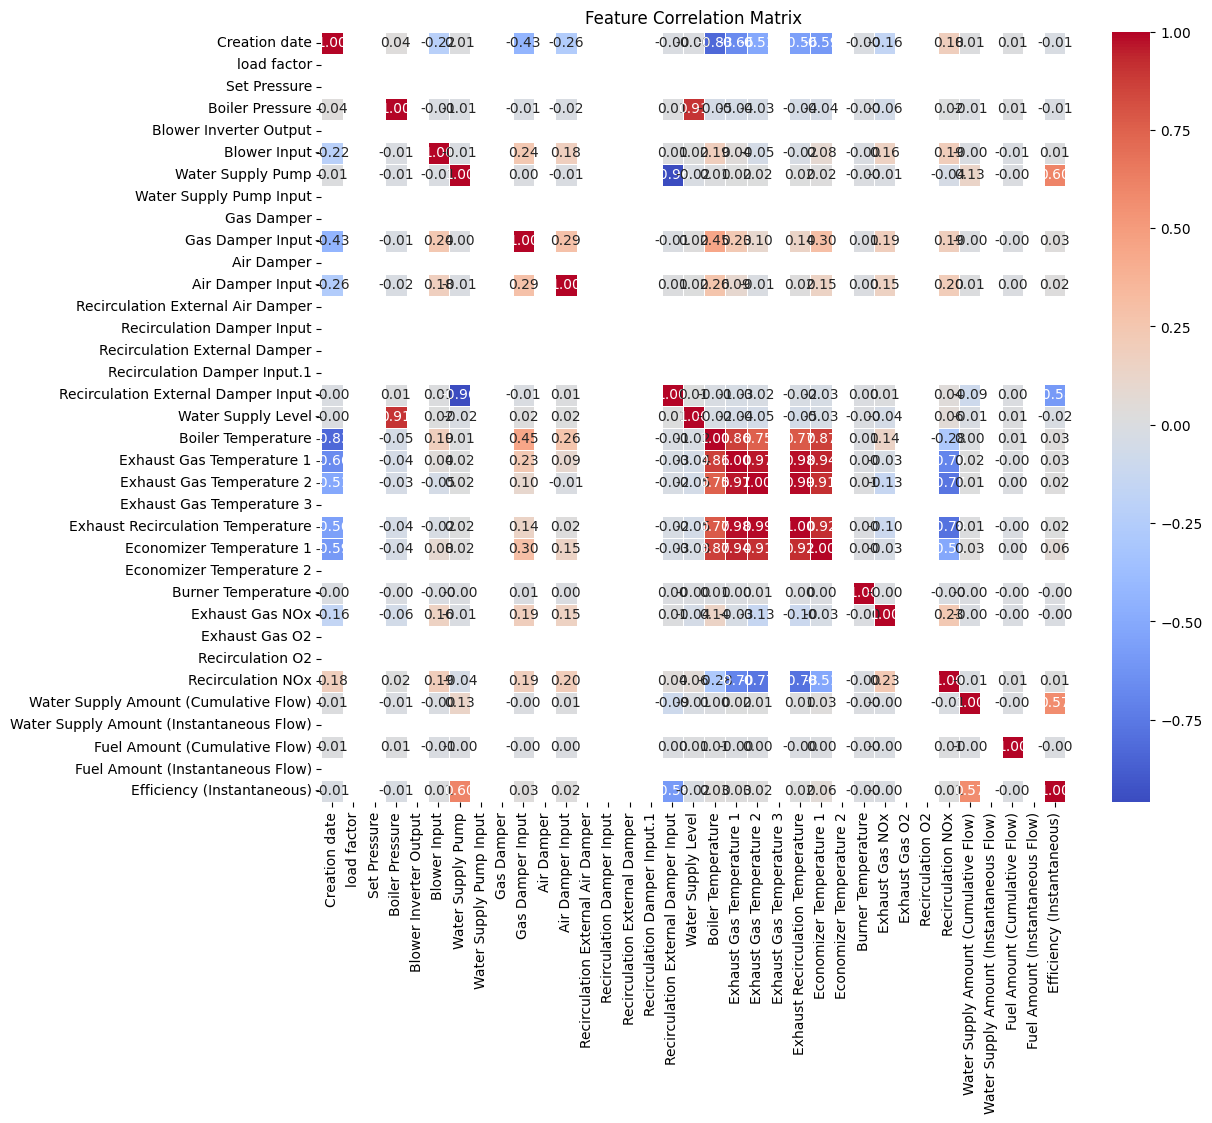

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
corr_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# pairplot 시각화
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


Output hidden; open in https://colab.research.google.com to view.

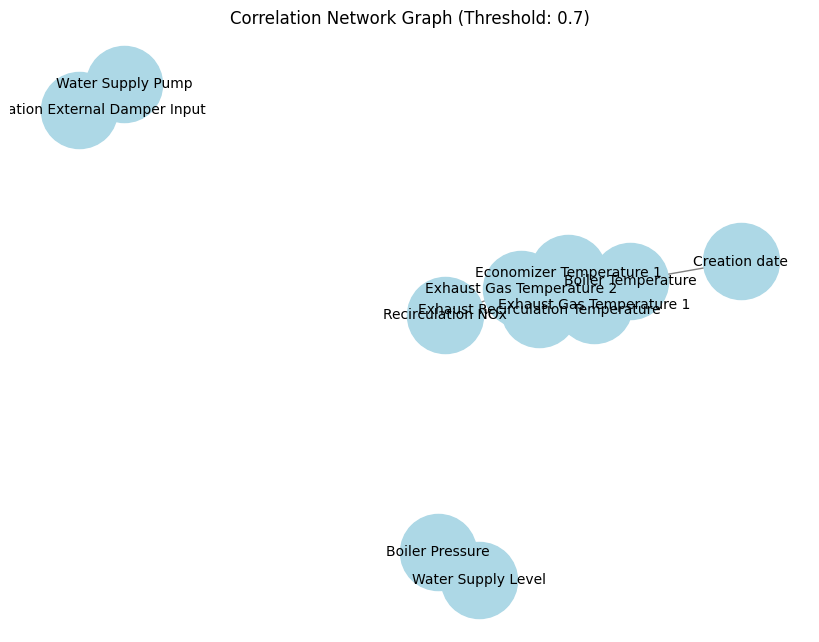

In [ ]:
import networkx as nx

# 상관계수 행렬 계산
corr_matrix = df.corr().abs()

# 상관계수가 일정 값 이상인 것만 필터링 (예: 0.7 이상)
threshold = 0.7
filtered_corr = corr_matrix[corr_matrix >= threshold]

# 네트워크 그래프 생성
G = nx.Graph()

# 상관관계가 높은 변수들만 엣지로 추가
for i in filtered_corr.columns:
    for j in filtered_corr.index:
        if i != j and filtered_corr.loc[i, j] >= threshold:
            G.add_edge(i, j, weight=filtered_corr.loc[i, j])

# 네트워크 그래프 그리기
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, edge_color='gray')
plt.title('Correlation Network Graph (Threshold: 0.7)')
plt.show()


# XGBoost 모델 랜덤 서치 안씀 - 주열
위에거 쓰면됨

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 타겟 변수 리스트 정의 (사용자의 타겟 변수에 맞게 조정 필요)
target_columns = [
    'load factor', 'Set Pressure', 'Boiler Pressure', 'Blower Inverter Output',
    'Blower Input', 'Water Supply Pump', 'Water Supply Pump Input', 'Gas Damper',
    'Gas Damper Input', 'Air Damper', 'Air Damper Input', 'Recirculation External Air Damper',
    'Recirculation Damper Input', 'Recirculation External Damper', 'Recirculation Damper Input',
    'Recirculation External Damper Input', 'Water Supply Level', 'Boiler Temperature',
    'Exhaust Gas Temperature 1', 'Exhaust Gas Temperature 2', 'Exhaust Gas Temperature 3',
    'Exhaust Recirculation Temperature', 'Economizer Temperature 1', 'Economizer Temperature 2',
    'Burner Temperature', 'Exhaust Gas NOx', 'Exhaust Gas O2', 'Recirculation O2',
    'Recirculation NOx', 'Water Supply Amount (Cumulative Flow)',
    'Water Supply Amount (Instantaneous Flow)', 'Fuel Amount (Cumulative Flow)',
    'Fuel Amount (Instantaneous Flow)', 'Efficiency (Instantaneous)'
]

# 독립 변수와 종속 변수 분리
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 멀티 아웃풋 회귀 모델 학습
model = MultiOutputRegressor(xgb.XGBRegressor())
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

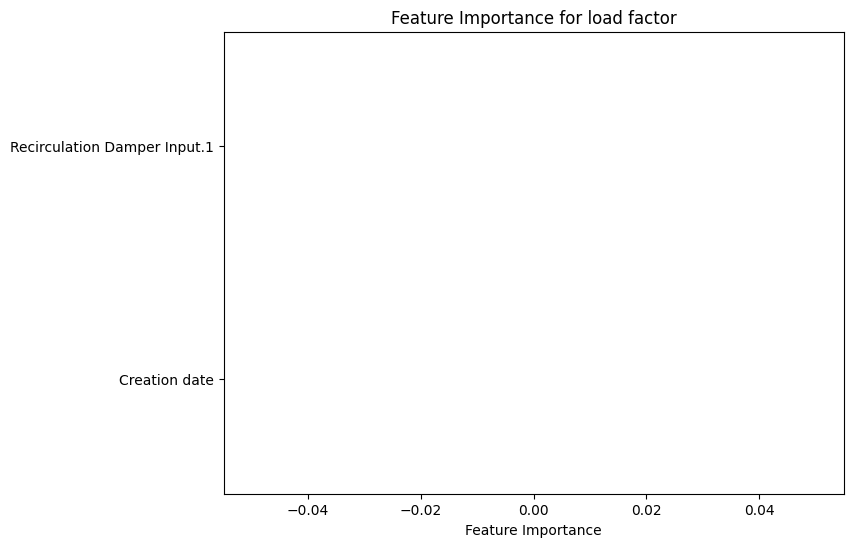

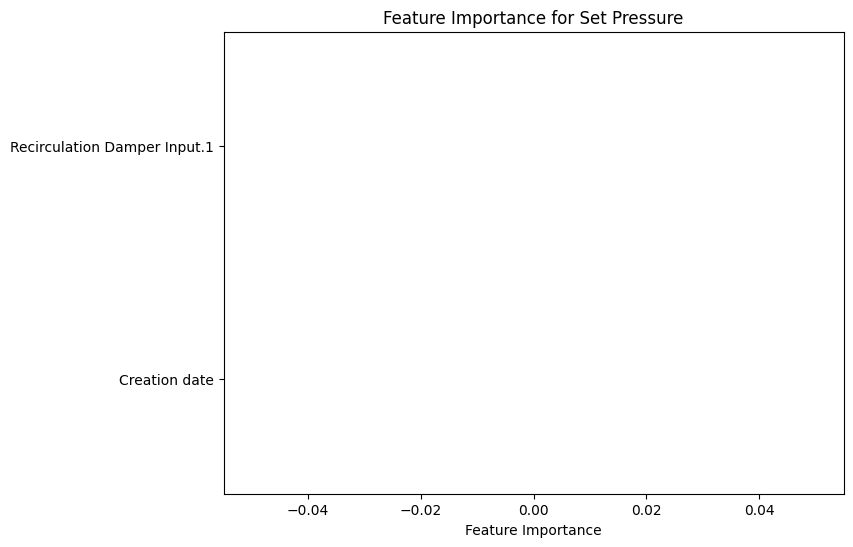

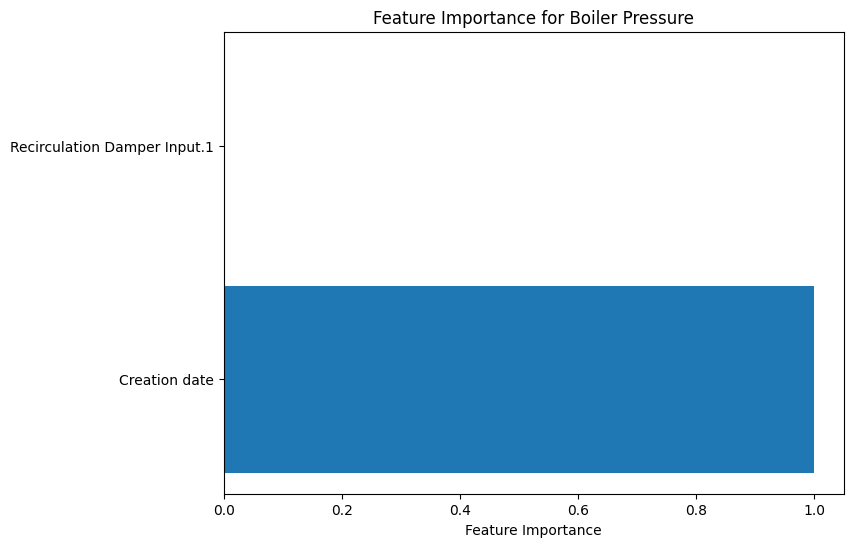

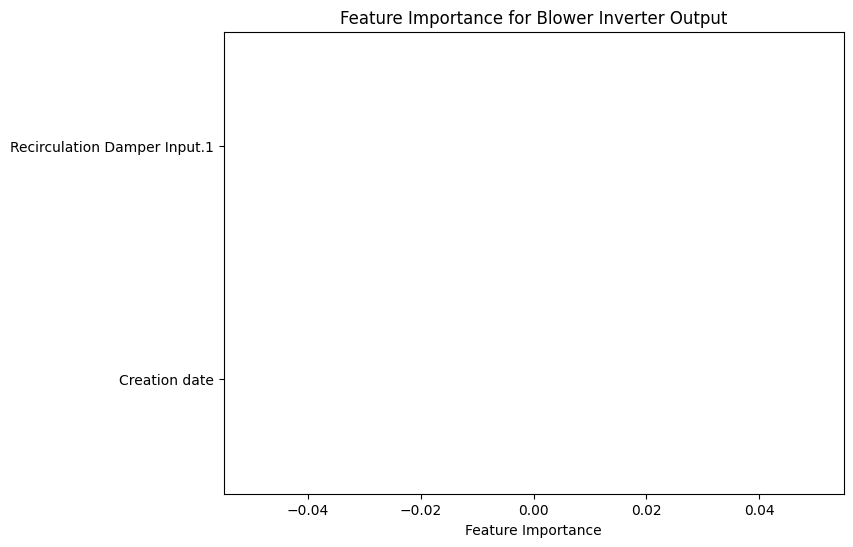

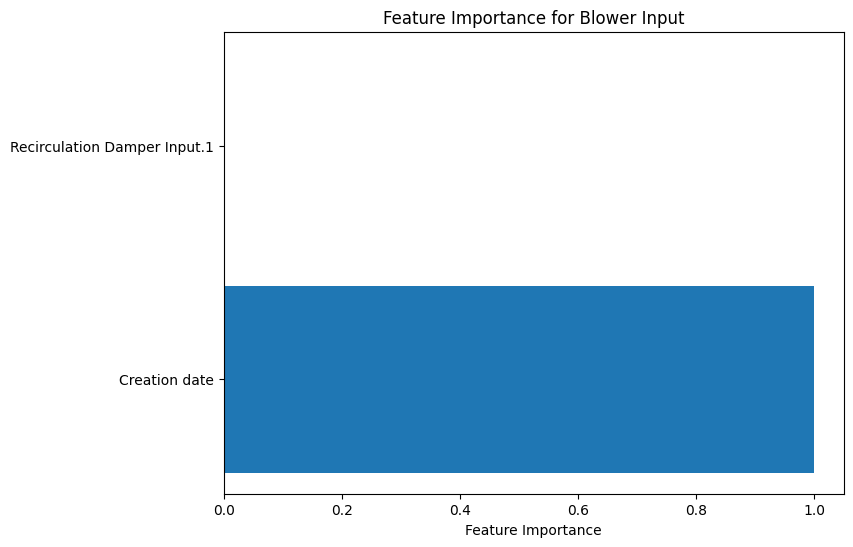

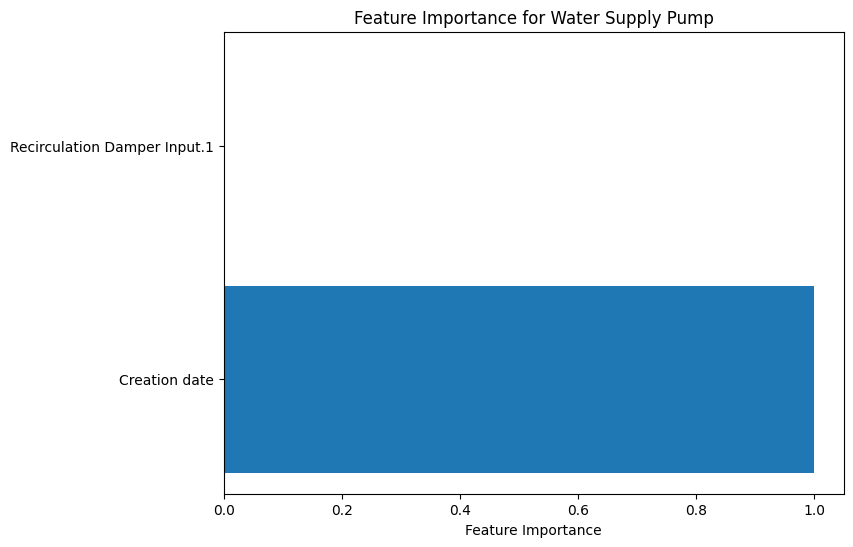

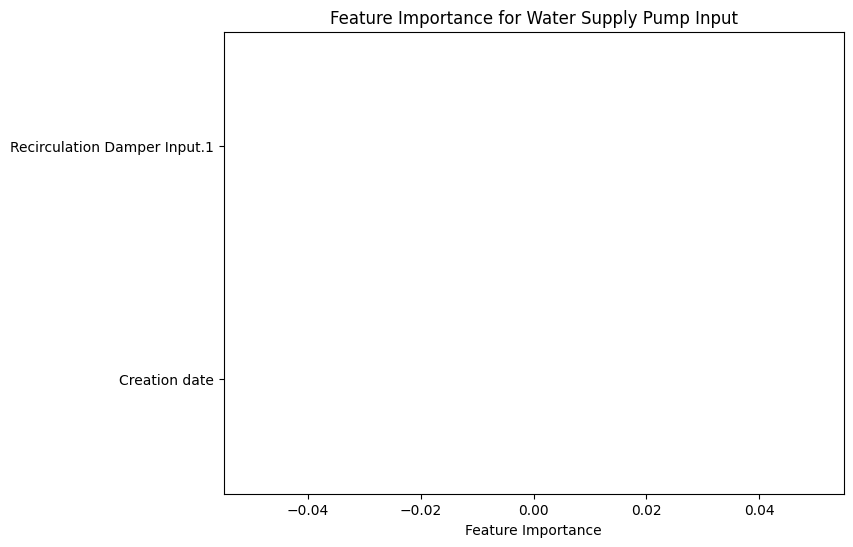

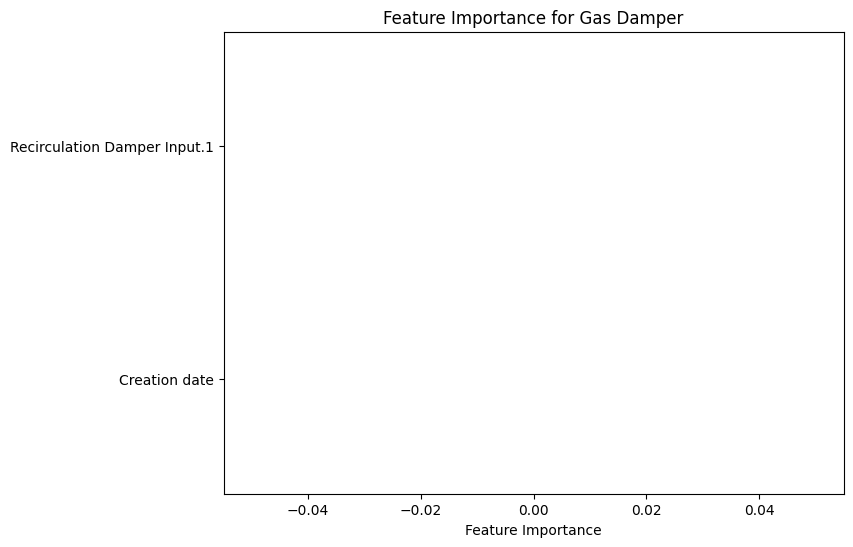

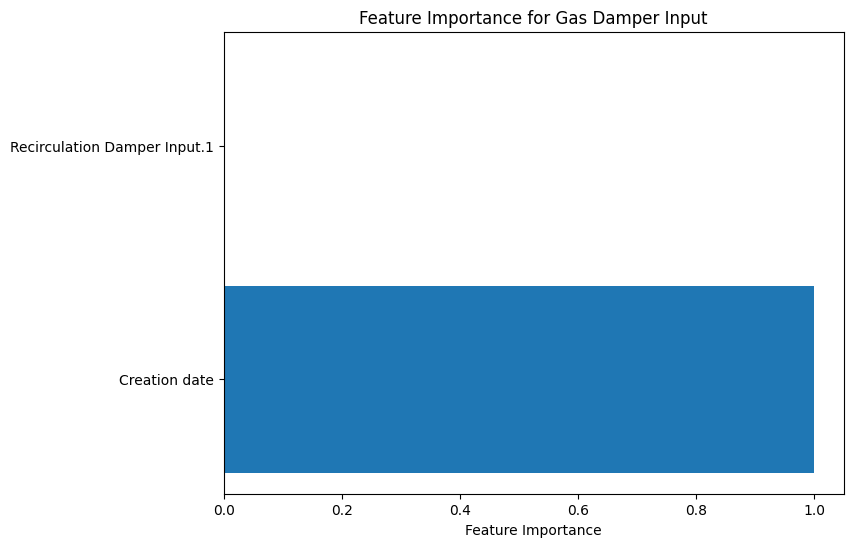

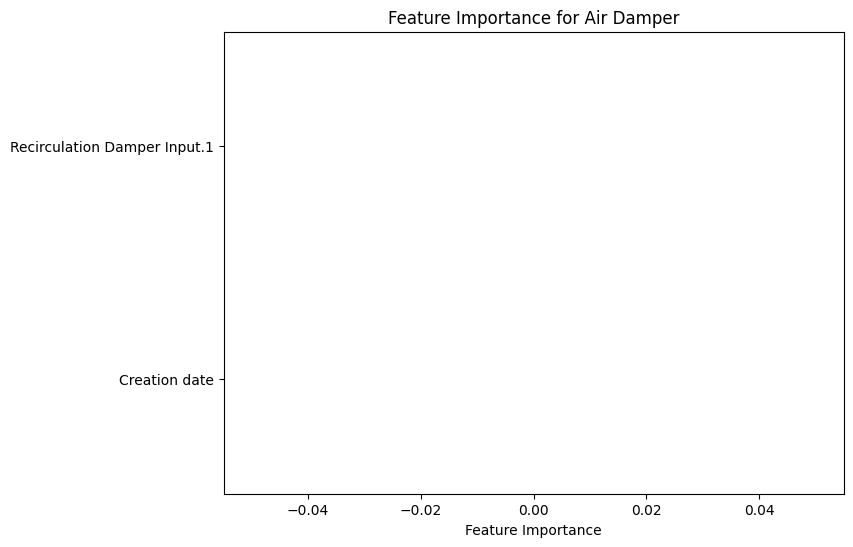

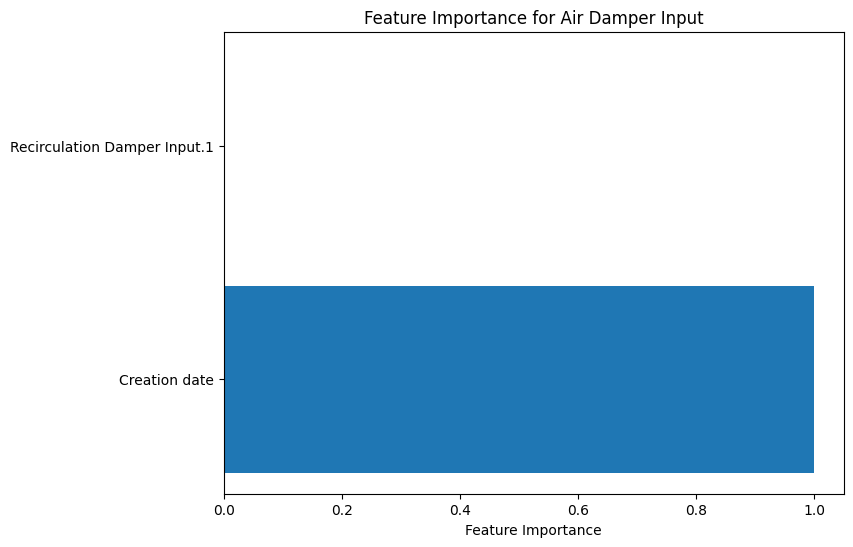

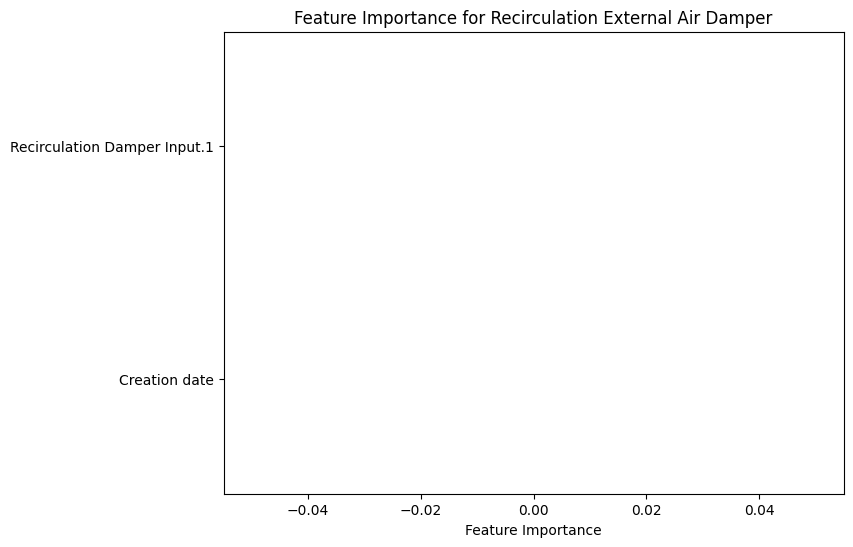

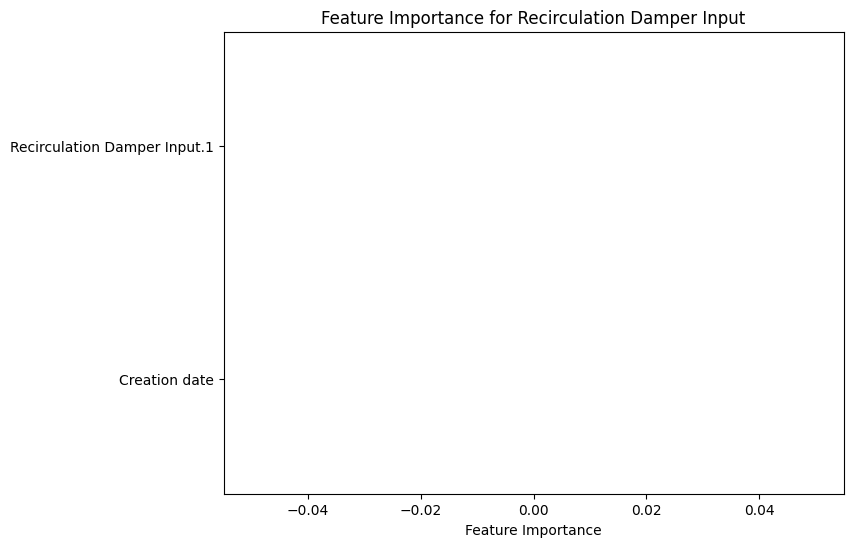

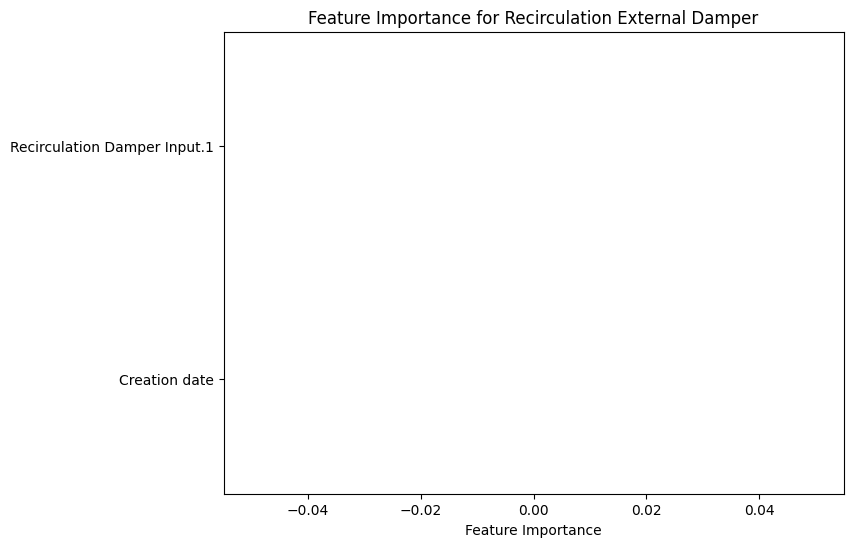

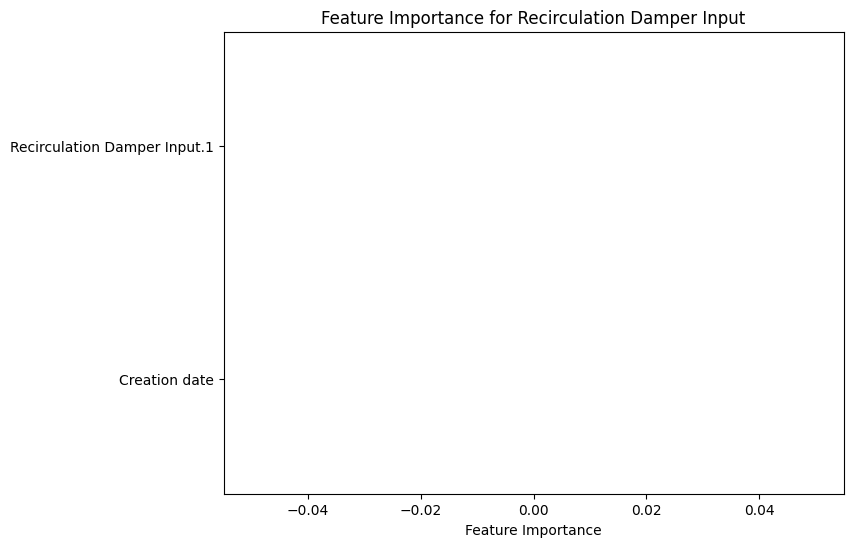

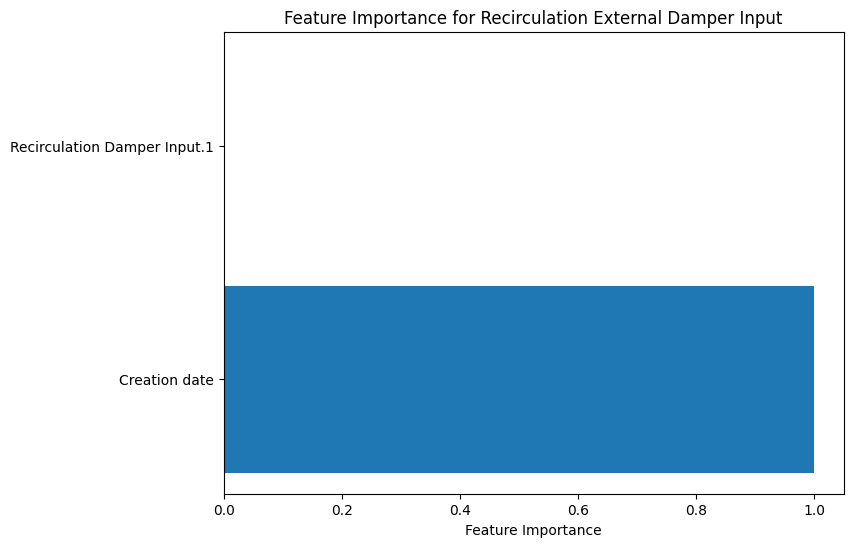

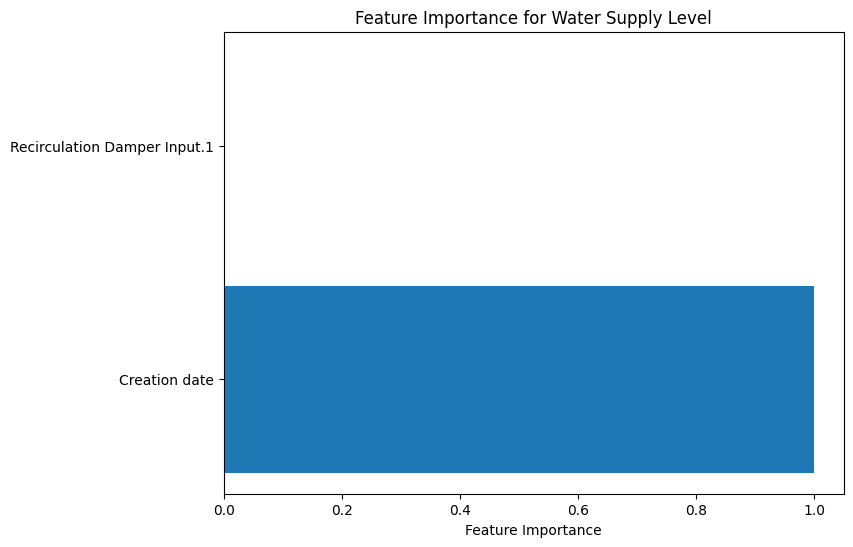

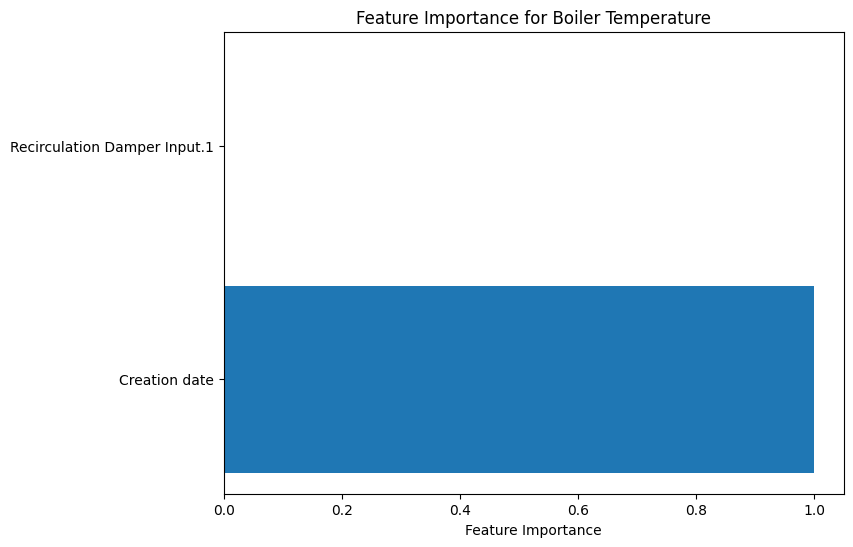

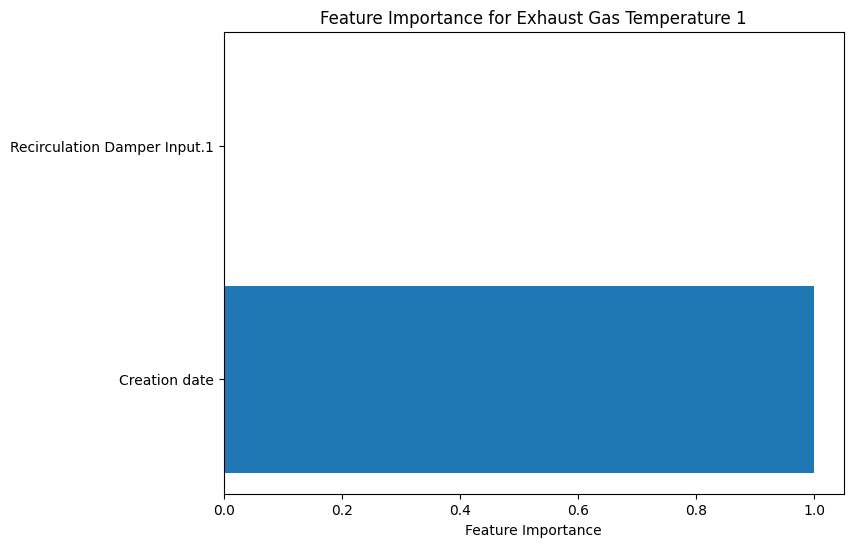

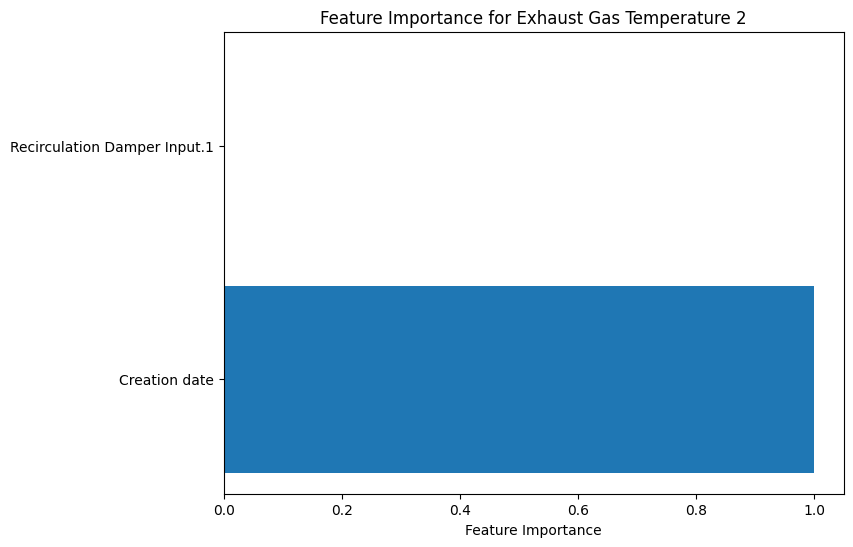

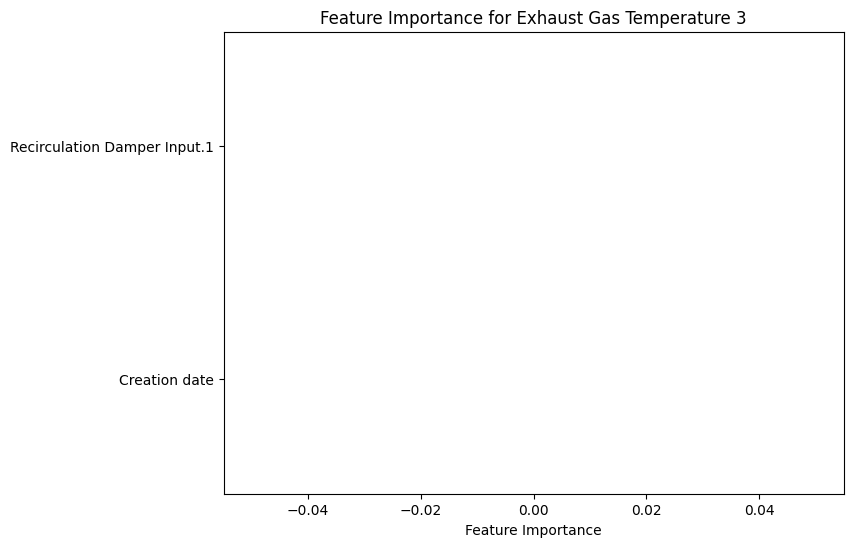

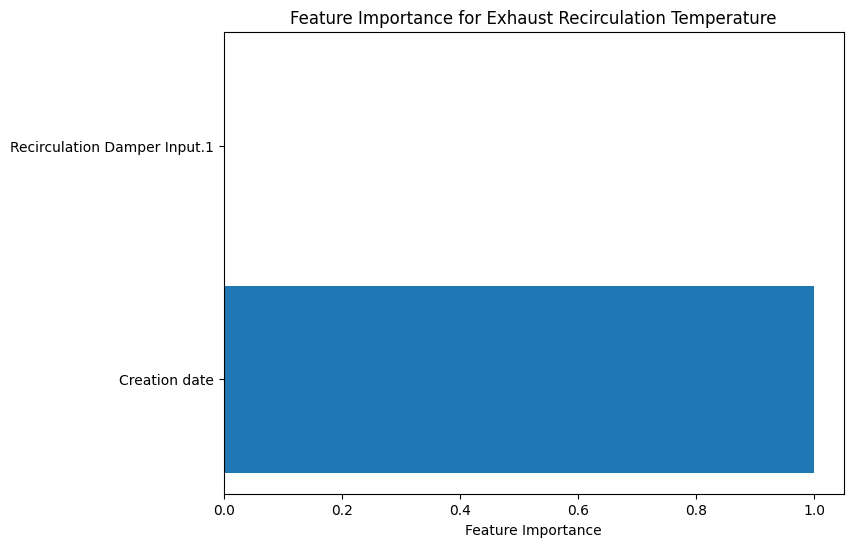

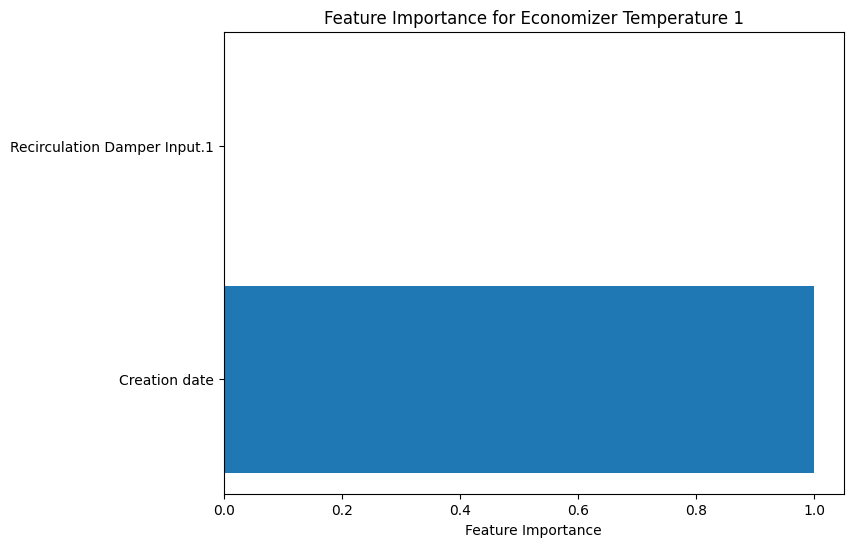

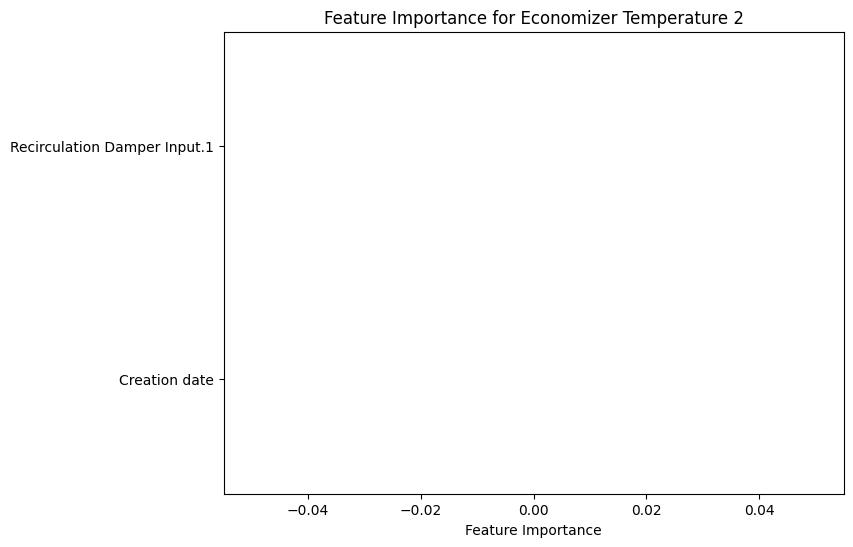

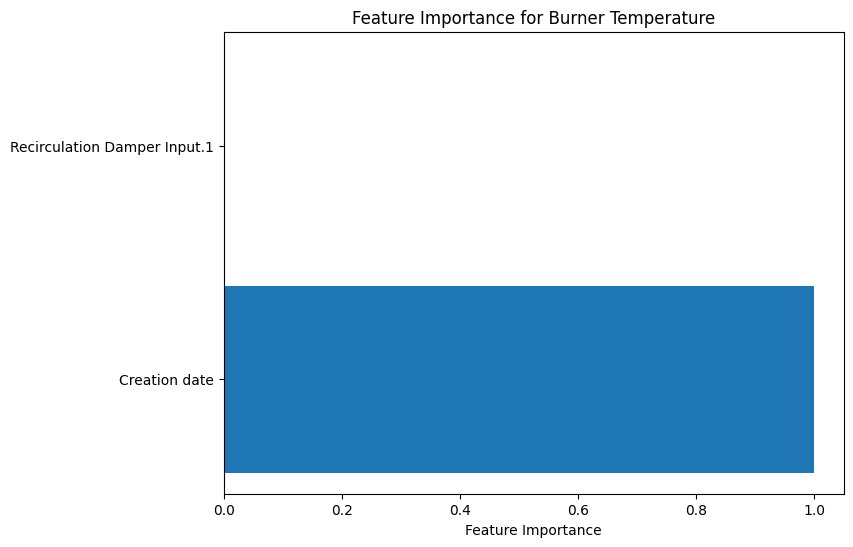

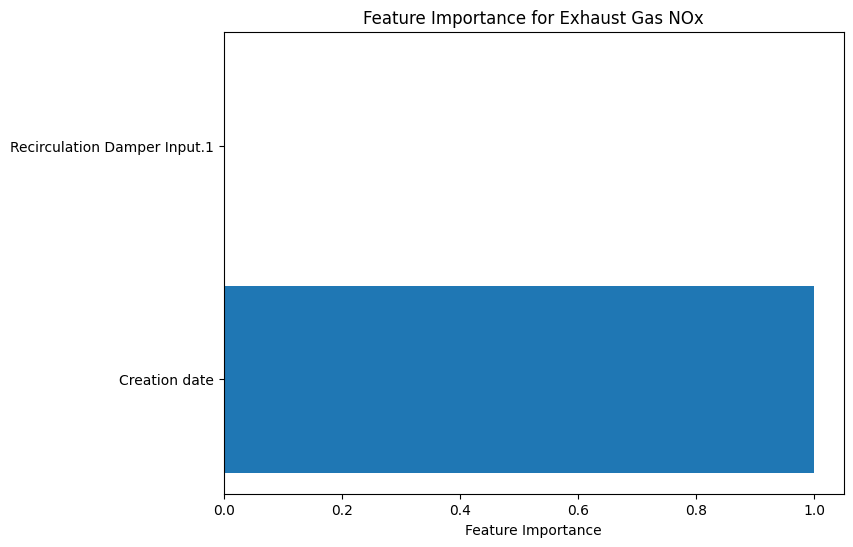

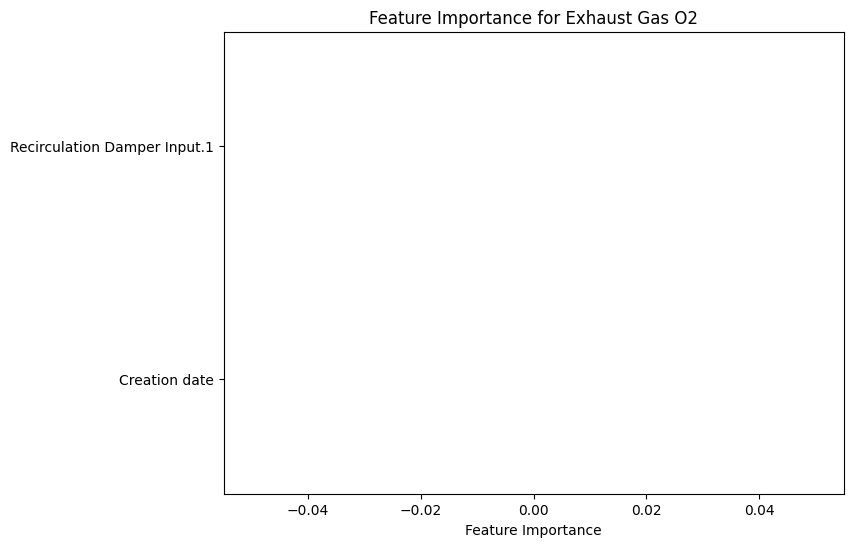

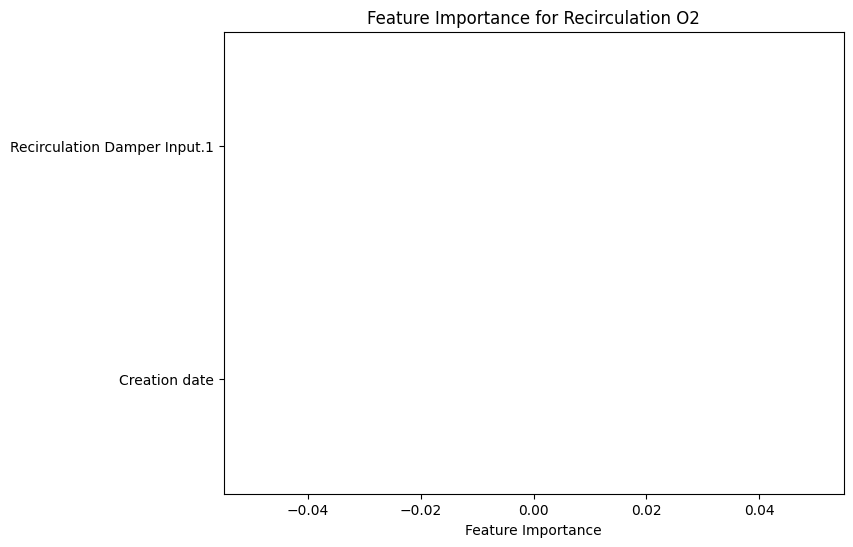

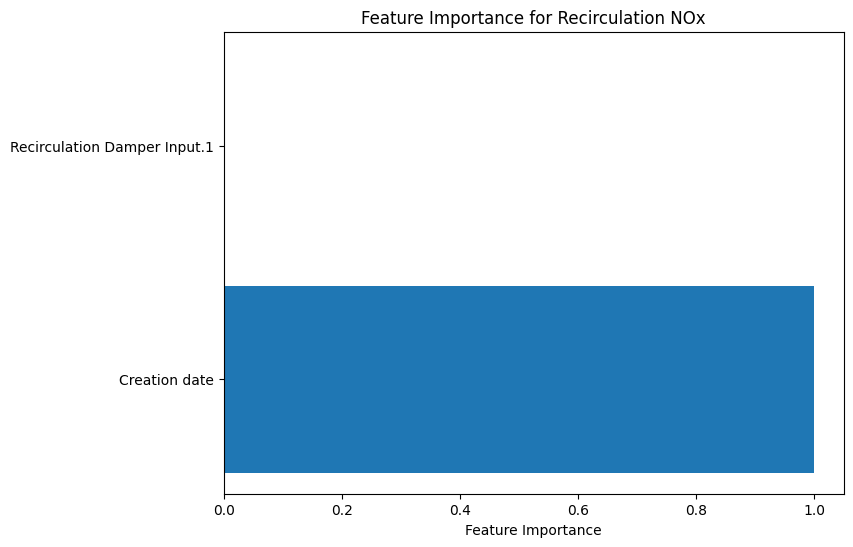

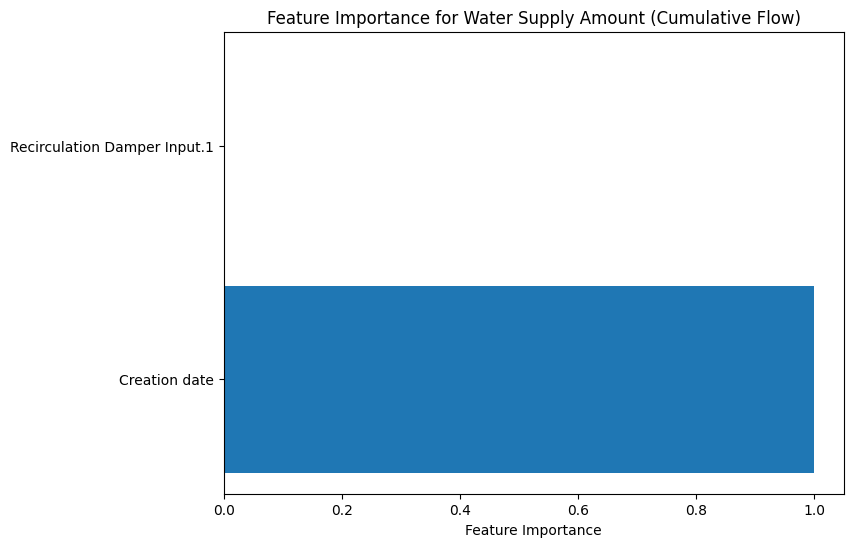

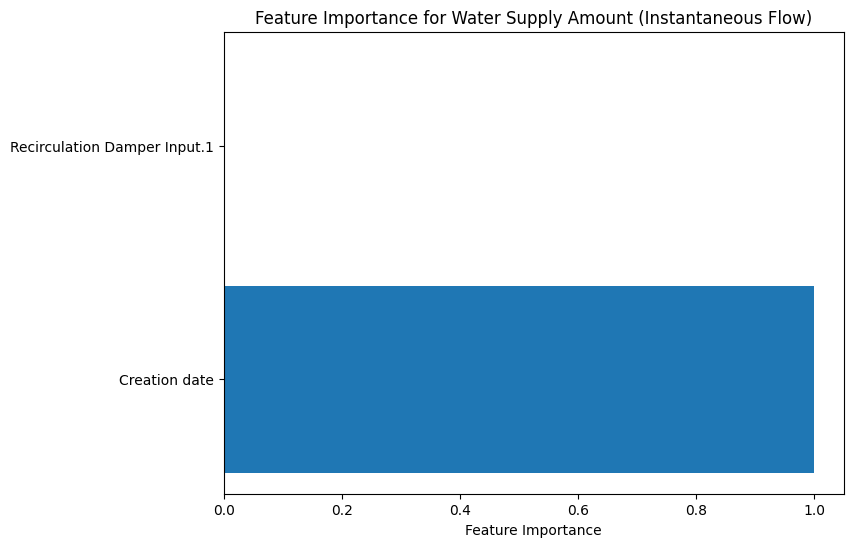

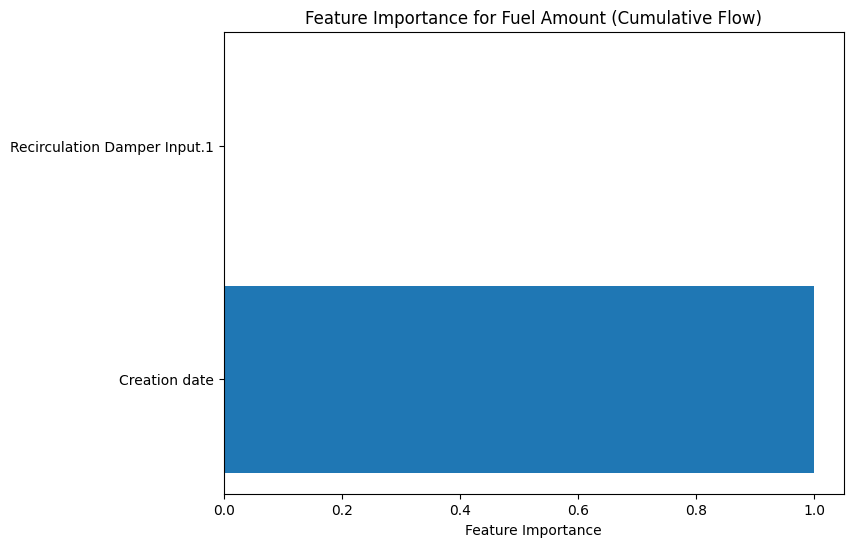

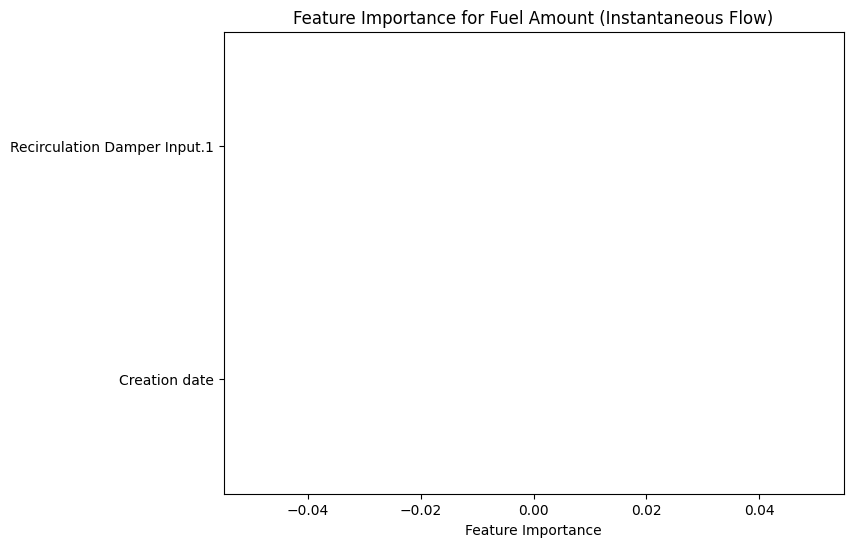

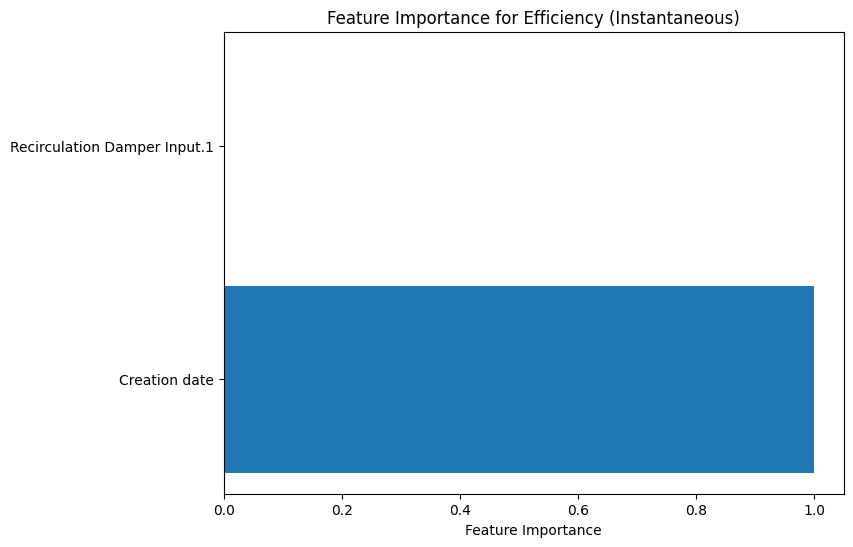

In [ ]:
# 피처 중요도 시각화
for i, target in enumerate(target_columns):
    feature_importance = model.estimators_[i].feature_importances_
    features = X.columns

    plt.figure(figsize=(8, 6))
    plt.barh(features, feature_importance)
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for {target}')
    plt.show()
